In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('data/Deribit_BTC_L1_1min-2.csv')

In [2]:
# Mostrar información básica del DataFrame
print(df.info())

# Mostrar las primeras filas
print(df.head())

# Mostrar estadísticas descriptivas
print(df.describe())

# Convertir la columna de tiempo a datetime
df['ts'] = pd.to_datetime(df['ts'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ts                10000 non-null  object 
 1   instrument_name   10000 non-null  object 
 2   currency          10000 non-null  object 
 3   expiration        10000 non-null  object 
 4   strike            10000 non-null  int64  
 5   putcall           10000 non-null  object 
 6   best_bid_amount   10000 non-null  float64
 7   best_bid_price    10000 non-null  float64
 8   mark_price        10000 non-null  float64
 9   best_ask_price    10000 non-null  float64
 10  best_ask_amount   10000 non-null  float64
 11  is_atm            10000 non-null  bool   
 12  open_interest     10000 non-null  float64
 13  delta             10000 non-null  float64
 14  gamma             10000 non-null  float64
 15  rho               10000 non-null  float64
 16  theta             10000 non-null  float64

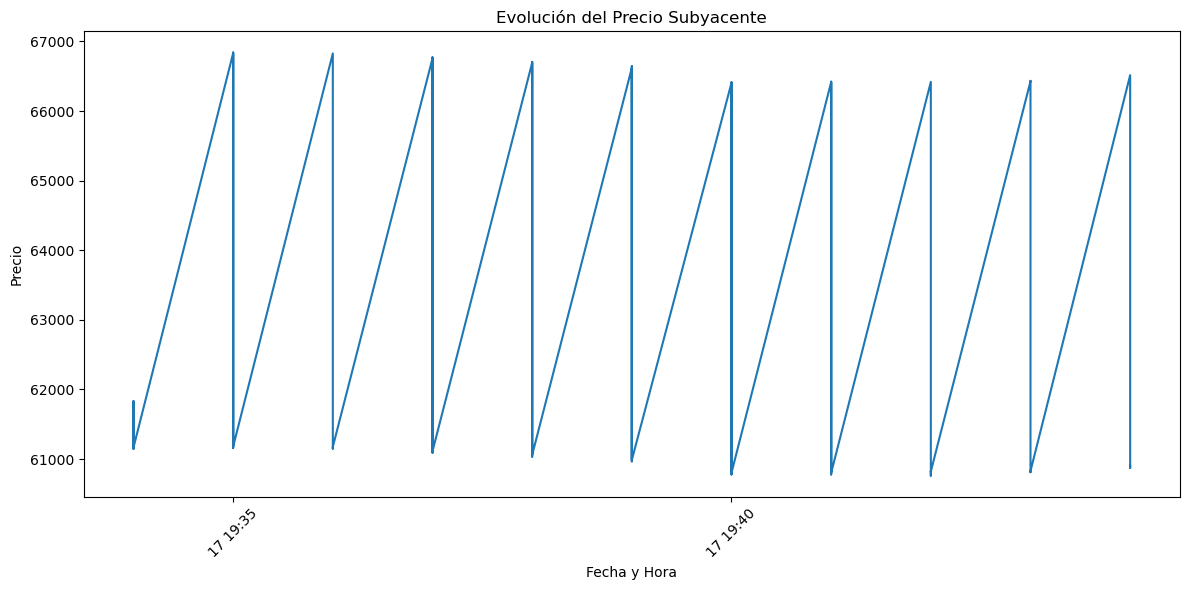

In [3]:
# Análisis de la evolución del precio subyacente
plt.figure(figsize=(12, 6))
plt.plot(df['ts'], df['underlying_price'])
plt.title('Evolución del Precio Subyacente')
plt.xlabel('Fecha y Hora')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Patrón repetitivo: Se observa un patrón de dientes de sierra que se repite varias veces. Esto sugiere una fluctuación regular y periódica del precio.
Rango de precios: El precio oscila aproximadamente entre 61,000 y 67,000 unidades (presumiblemente dólares estadounidenses).
Volatilidad: Hay una volatilidad significativa, con cambios abruptos en el precio tanto al alza como a la baja.
Periodicidad: El patrón parece repetirse aproximadamente cada 5 minutos, basándonos en las marcas del eje x.
Tendencia general: No se observa una tendencia clara al alza o a la baja durante este período; el precio fluctúa dentro de un rango relativamente constante.
Picos y valles: Los picos tienden a alcanzar niveles similares, al igual que los valles, lo que sugiere cierta estabilidad en los niveles de soporte y resistencia.
Simetría: Los movimientos ascendentes y descendentes parecen ser bastante simétricos en términos de duración y magnitud.

Interpretaciones y conclusiones:

Comportamiento algorítmico: Este patrón tan regular podría ser el resultado de trading algorítmico o de alta frecuencia.
Liquidez del mercado: Las fluctuaciones rápidas y regulares sugieren un mercado muy líquido con un alto volumen de operaciones.
Oportunidades de trading: Este patrón podría ofrecer oportunidades para estrategias de trading de corto plazo o scalping.
Estabilidad relativa: A pesar de la volatilidad a corto plazo, el precio se mantiene dentro de un rango, lo que podría indicar una cierta estabilidad en el mercado durante este período.
Posible impacto en opciones: Estas fluctuaciones rápidas podrían tener un impacto significativo en la valoración de opciones a corto plazo.
Necesidad de análisis adicional: Sería útil examinar el volumen de operaciones y otros indicadores técnicos para comprender mejor las causas de este patrón.
Consideraciones para la gestión de riesgos: La volatilidad observada subraya la importancia de una gestión de riesgos adecuada en operaciones de corto plazo.

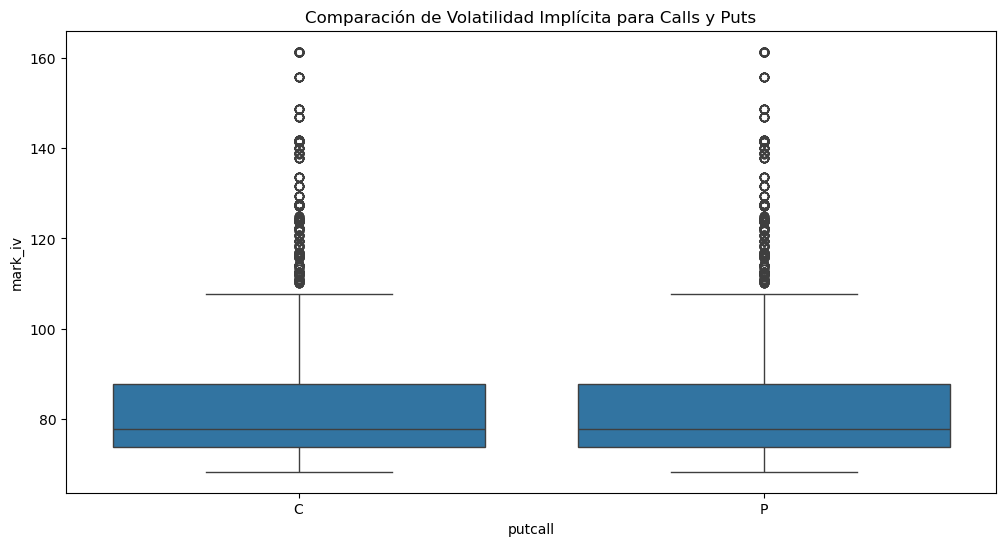

In [4]:
# Comparación de volatilidad implícita para calls y puts
plt.figure(figsize=(12, 6))
sns.boxplot(x='putcall', y='mark_iv', data=df)
plt.title('Comparación de Volatilidad Implícita para Calls y Puts')
plt.show()

Mediana similar: Las líneas centrales de las cajas para Call y Put están prácticamente al mismo nivel, indicando que la mediana de la volatilidad implícita es muy similar para ambos tipos de opciones.
Rango intercuartílico: Las cajas, que representan el 50% central de los datos, son casi idénticas en tamaño y posición para Call y Put, sugiriendo una distribución muy similar de la volatilidad implícita.
Valores atípicos: Ambos tipos de opciones muestran numerosos valores atípicos (círculos) por encima de las cajas, pero parecen ser más numerosos y extremos para las opciones Call.
Simetría: La distribución parece ser ligeramente asimétrica hacia arriba para ambos tipos, con una cola superior más larga.
Rango: El rango general de volatilidad implícita parece ser muy similar para Call y Put, extendiéndose aproximadamente desde 70% hasta 160%.
Concentración: La mayoría de los valores de volatilidad implícita se concentran entre aproximadamente 75% y 85% para ambos tipos de opciones.

Interpretaciones:

Paridad Put-Call: La similitud en la distribución de IV entre Call y Put sugiere que el mercado tiene expectativas de volatilidad similares para movimientos al alza y a la baja del precio de Bitcoin.
Consistencia del mercado: La estrecha alineación de las distribuciones de IV indica un mercado de opciones bien desarrollado y eficiente para Bitcoin.
Expectativas de volatilidad: Los valores atípicos superiores podrían representar opciones con strikes extremos o fechas de vencimiento lejanas, donde las expectativas de volatilidad son más altas.
Liquidez: La concentración de IV en un rango relativamente estrecho sugiere que la mayoría de las opciones negociadas tienen niveles de volatilidad implícita similares, lo que podría indicar buena liquidez en ese rango.
Sesgos del mercado: La ligera asimetría hacia arriba podría indicar una pequeña preferencia del mercado por protección contra movimientos extremos del precio.

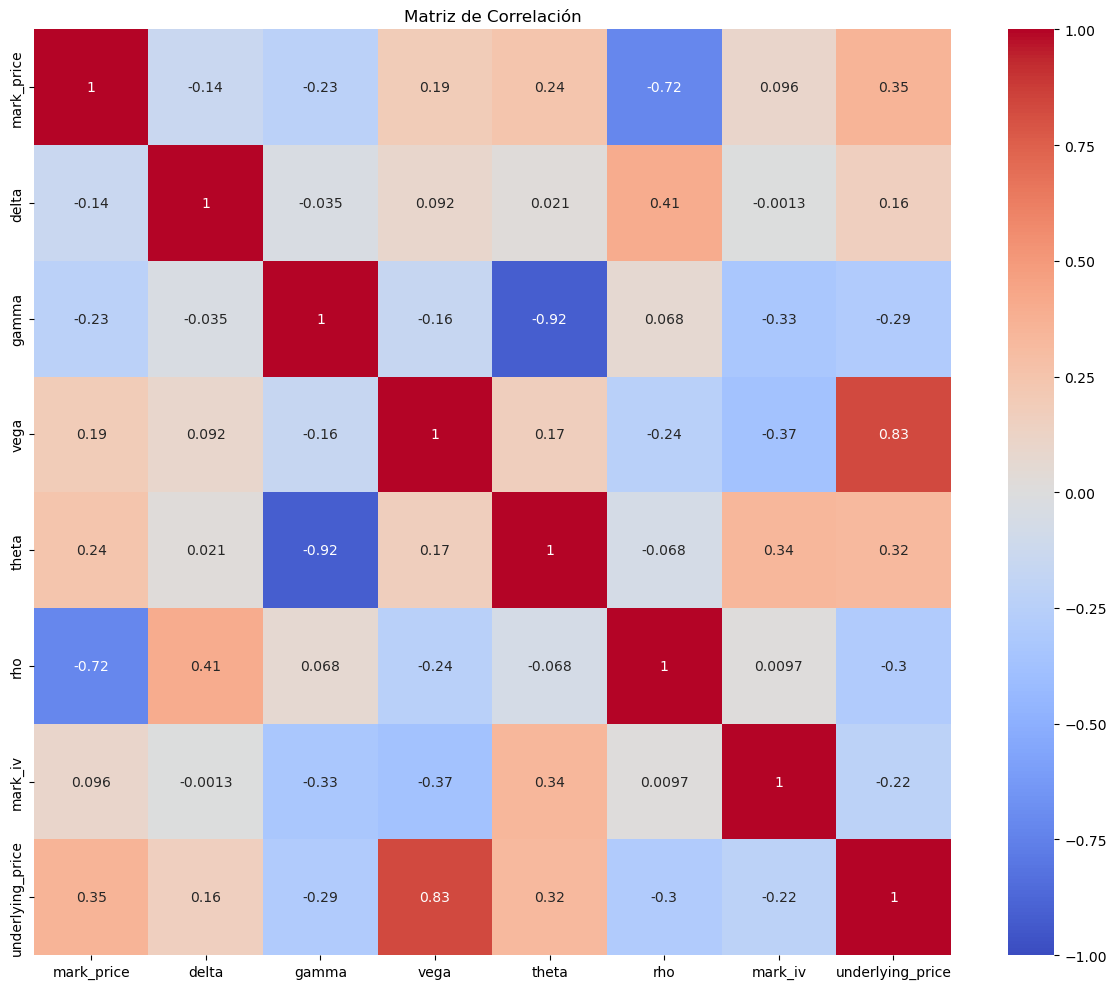

In [5]:
# Análisis de correlación
correlation_columns = ['mark_price', 'delta', 'gamma', 'vega', 'theta', 'rho', 'mark_iv', 'underlying_price']
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Esta matriz de correlación proporciona información valiosa sobre las relaciones entre las diferentes "griegas" y otras métricas importantes en el mercado de opciones. Aquí están las observaciones clave:

Precio subyacente (underlying_price):

Fuerte correlación positiva con vega (0.83)
Correlación positiva moderada con mark_price (0.35) y theta (0.32)
Correlación negativa moderada con gamma (-0.29) y rho (-0.3)


Mark price:

Correlación negativa fuerte con rho (-0.72)
Correlaciones positivas moderadas con theta (0.24) y vega (0.19)


Delta:

Correlación positiva moderada con rho (0.41)
Correlaciones débiles con otras métricas


Gamma:

Correlación negativa muy fuerte con theta (-0.92)
Correlación negativa moderada con mark_iv (-0.33)


Vega:

Fuerte correlación positiva con underlying_price (0.83)
Correlación negativa moderada con mark_iv (-0.37)


Theta:

Correlación negativa muy fuerte con gamma (-0.92)
Correlaciones positivas moderadas con mark_iv (0.34) y underlying_price (0.32)


Rho:

Correlación negativa fuerte con mark_price (-0.72)
Correlación positiva moderada con delta (0.41)


Mark_iv (volatilidad implícita):

Correlaciones moderadas con theta (0.34), gamma (-0.33), y vega (-0.37)



Interpretaciones clave:

La fuerte correlación negativa entre gamma y theta (-0.92) es consistente con la teoría de opciones, ya que opciones con alto gamma (cerca del dinero) tienden a tener un theta más negativo.
La fuerte correlación positiva entre vega y el precio subyacente (0.83) sugiere que la sensibilidad a la volatilidad aumenta con el precio del activo subyacente.
La correlación negativa entre mark_price y rho (-0.72) indica que los precios de las opciones tienden a disminuir cuando aumenta la sensibilidad a las tasas de interés.
La débil correlación de delta con otras métricas sugiere que su comportamiento es relativamente independiente.
La correlación negativa entre gamma y el precio subyacente (-0.29) indica que la convexidad tiende a disminuir ligeramente a medida que aumenta el precio del subyacente.
La volatilidad implícita (mark_iv) muestra correlaciones moderadas con varias griegas, lo que subraya su importancia en la valoración de opciones.

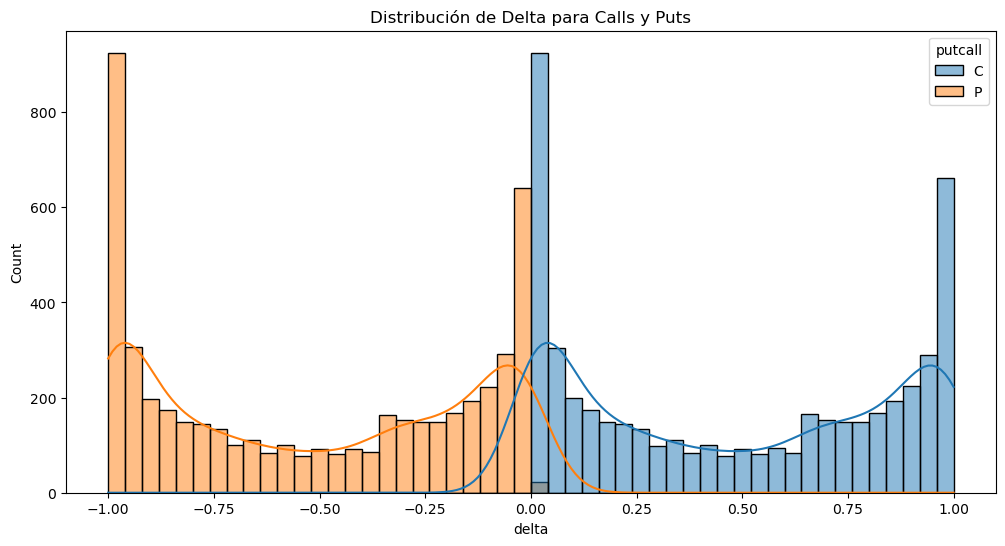

In [6]:
# Distribución de delta para calls y puts
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='delta', hue='putcall', kde=True, bins=50)
plt.title('Distribución de Delta para Calls y Puts')
plt.show()

Este histograma compara la distribución de los valores de delta para opciones de compra (Call, C) y opciones de venta (Put, P). A continuación, se presenta un análisis de las características clave:

Rango:
Las opciones de compra (en azul) tienen valores de delta que varían de 0 a 1.
Las opciones de venta (en naranja) tienen valores de delta que varían de -1 a 0.
Simetría:
La distribución general muestra una simetría aproximada alrededor del punto de delta 0.
Picos:
Las opciones de compra tienen un pico principal en delta ≈ 1 y un pico menor cerca de 0.
Las opciones de venta tienen un pico principal en delta ≈ -1 y un pico menor cerca de 0.
Opciones At-the-money:
Hay una concentración de opciones de compra y venta cerca de delta = 0, lo que representa opciones At-the-money (al precio de ejercicio).
Forma de la distribución:
Tanto las opciones de compra como las de venta muestran una distribución en forma de U, con frecuencias más altas en los extremos y en el centro.
In-the-money vs Out-of-the-money:
Hay más opciones deep in-the-money (con delta cerca de 1 para compras y -1 para ventas) que opciones deep out-of-the-money.
Continuidad:
La distribución es relativamente suave, lo que indica una buena variedad de precios de ejercicio disponibles.
Interpretaciones:
La simetría sugiere una visión equilibrada del mercado sobre el potencial de alza y baja.
Los picos en las deltas extremas indican un número significativo de opciones deep in-the-money.
La concentración alrededor de delta = 0 muestra una actividad significativa en las opciones At-the-money, que suelen ser las más líquidas.
La forma en U sugiere que los traders están particularmente interesados en opciones que están deep in-the-money o At-the-money.
La distribución suave indica un mercado de opciones líquido con una amplia gama de precios de ejercicio disponibles.

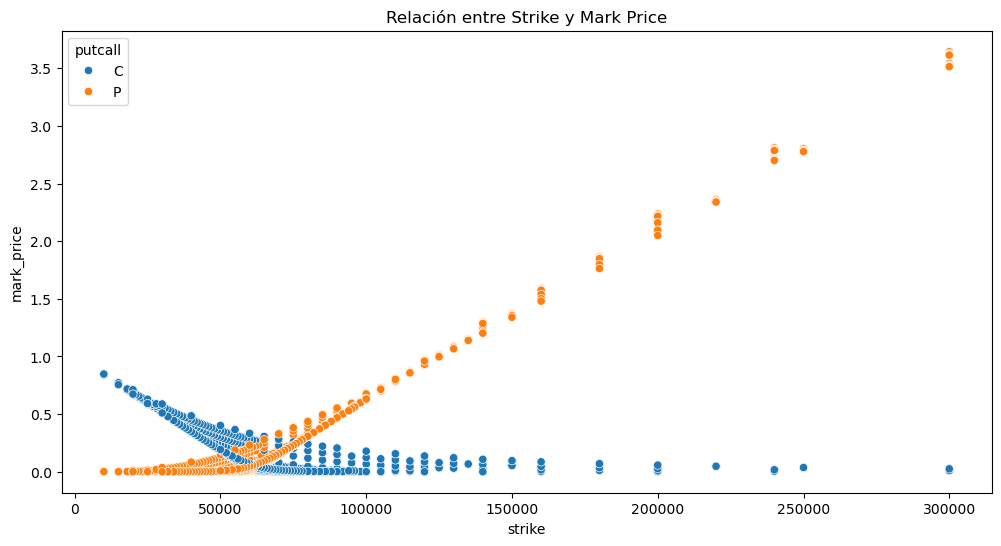

In [7]:
# Relación entre strike y mark_price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='strike', y='mark_price', hue='putcall', data=df)
plt.title('Relación entre Strike y Mark Price')
plt.show()

Este gráfico muestra la relación entre el precio de ejercicio (strike) y el precio de mercado (mark price) para opciones call (C) y put (P) de Bitcoin. Aquí están las principales observaciones y análisis:

Forma general:

Las opciones call muestran una tendencia descendente a medida que aumenta el strike.
Las opciones put muestran una tendencia ascendente a medida que aumenta el strike.
Estas tendencias son consistentes con la teoría de opciones básica.


Punto de intersección:

Las líneas de call y put se cruzan alrededor de un strike de 60,000-70,000, lo que probablemente indica el precio actual del Bitcoin.


Asimetría:

Las opciones put parecen tener precios más altos para strikes elevados comparado con las calls para strikes bajos.
Esto podría indicar una mayor demanda de protección contra caídas significativas del precio.


Concentración:

Hay una mayor concentración de opciones (más puntos) alrededor del punto de intersección, lo que sugiere mayor liquidez cerca del precio actual del activo.


Rango de strikes:

Los strikes van desde cerca de 0 hasta 300,000, mostrando una amplia gama de expectativas de precios.


Valores atípicos:

Hay algunos puntos de put con precios muy altos para strikes elevados, posiblemente opciones de cola larga para protección extrema.


Decaimiento del valor:

Para las calls, el precio disminuye rápidamente a medida que el strike aumenta por encima del punto de intersección.
Para las puts, el precio aumenta más gradualmente a medida que el strike aumenta.


Liquidez:

La densidad de puntos disminuye en los extremos, sugiriendo menor liquidez para opciones muy fuera del dinero.



Implicaciones:

El mercado parece estar funcionando eficientemente, con precios que reflejan las expectativas teóricas.
Hay una demanda significativa de opciones put de alta protección, lo que podría indicar preocupación por caídas grandes del mercado.
La mayor liquidez alrededor del precio actual del Bitcoin facilita la negociación y la formación de estrategias cerca del dinero.
La asimetría en la valoración de puts vs calls podría ofrecer oportunidades para estrategias de arbitraje o spread.
La amplia gama de strikes disponibles permite a los traders implementar una variedad de estrategias y expresar diversas opiniones sobre el mercado.

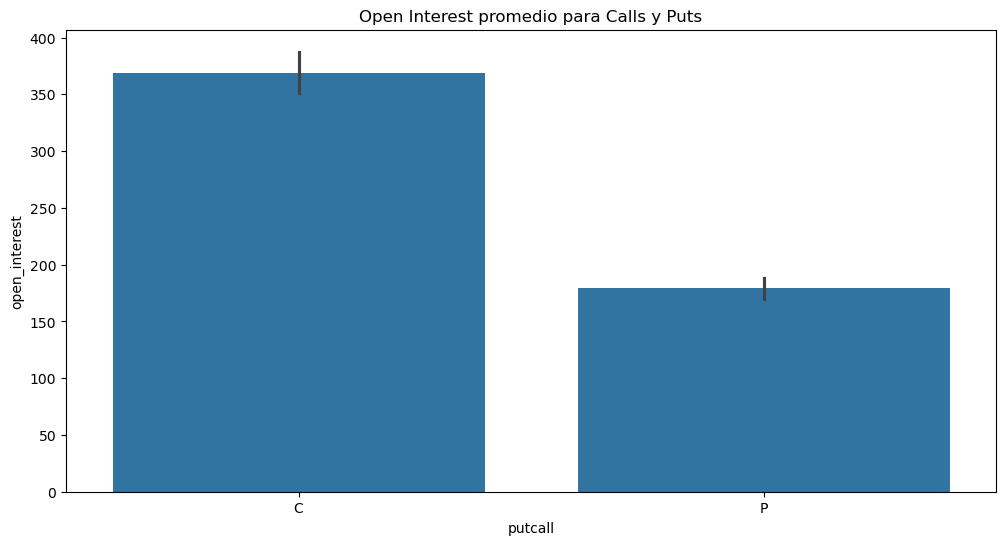

In [8]:
# Análisis de open interest
plt.figure(figsize=(12, 6))
sns.barplot(x='putcall', y='open_interest', data=df)
plt.title('Open Interest promedio para Calls y Puts')
plt.show()

Este gráfico de barras compara el interés abierto promedio para opciones de compra (Call, C) y opciones de venta (Put, P). A continuación, se presenta un análisis de las características clave:

Opciones de Compra (C):
El interés abierto promedio para las opciones de compra es de aproximadamente 370.
La barra de las opciones de compra es significativamente más alta que la de las opciones de venta.
Opciones de Venta (P):
El interés abierto promedio para las opciones de venta es de aproximadamente 180.
La barra de las opciones de venta es aproximadamente la mitad de la altura de la barra de las opciones de compra.
Diferencia:
Las opciones de compra tienen aproximadamente el doble de interés abierto promedio que las opciones de venta.
Barras de error:
Ambas barras tienen pequeñas barras de error en la parte superior, lo que indica algo de variación en los datos, pero la diferencia sigue siendo significativa.
Interpretaciones:
Sentimiento del Mercado:
El mayor interés abierto en las opciones de compra sugiere un sentimiento alcista en el mercado. Los traders parecen más interesados en los movimientos alcistas potenciales.
Cobertura vs Especulación:
El menor interés abierto en las opciones de venta podría indicar una menor demanda de protección a la baja, o podría sugerir que los traders están utilizando otros instrumentos (como futuros) para cobertura.
Liquidez:
Es probable que las opciones de compra tengan mayor liquidez debido al mayor interés abierto, lo que podría llevar a spreads de compra-venta más ajustados.
Estrategias de Opciones:
La disparidad podría influir en la elección de estrategias de opciones. Por ejemplo, podría ser más fácil implementar estrategias que involucren múltiples compras debido a la mayor liquidez.
Expectativas del Mercado:
El mayor interés abierto en las compras podría indicar expectativas de aumentos de precios en el activo subyacente (posiblemente Bitcoin en este caso).
Percepción del Riesgo:
El menor interés abierto en las ventas podría sugerir que el mercado percibe un menor riesgo a la baja, o que la protección a la baja se está buscando a través de otros medios.
Oportunidades de Trading:
La diferencia en el interés abierto podría presentar oportunidades de arbitraje o trading de volatilidad para traders sofisticados.